ulabels [0]
len of ulabels 1


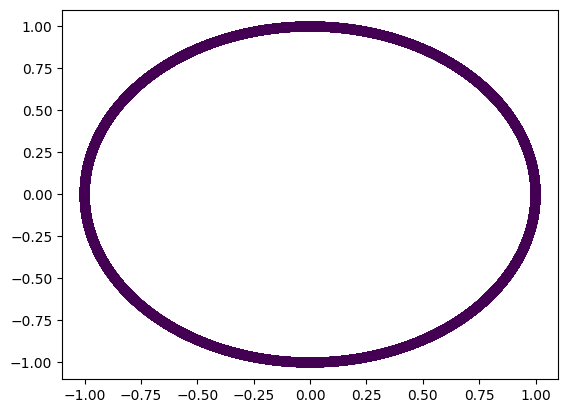

In [28]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics



def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    """
    X_reduced = None
    ####################### TODO: Use sklearn.decomposition.PCA to implement this function #####################
    X_reduced = PCA(n_components=n_components).fit_transform(X)
    ###########################################################################################################
    return X_reduced

DB_Path="dataset/"
DB=None
with open(DB_Path+'DB1k.csv', 'r', newline='') as f:
    DB = f.readlines()
    DB = [x.strip() for x in DB]
    for i,x in enumerate(DB):
            x=x.split(',')
            x=np.array(x[1:],dtype=np.float32)
            DB[i]=x   
    #  print(len(DB))
    # print(DB)


result = compute_pca(DB, 2)
# plt.scatter(result[:, 0], result[:, 1])
# plt.show()
# print(result.shape)
# result=result.reshape(1,-1)
length = np.sqrt((result**2).sum(axis=1))[:,None]
result = result / length
# db = DBSCAN(eps=epsilon, min_samples=10,metric="cosine").fit(result)
# db = KMeans(n_clusters=10).fit(result)
# good eps 0.02 and min_samples=10 for DBSCAN 1k ==> N_clusters=38
# good eps 0.005 and min_samples = 10 for DBSCAN 10k ==> N_cluster=32
epsilon=0.02
db = DBSCAN(eps=epsilon, min_samples=10).fit(result)
# print(db.labels_)
print('ulabels',np.unique(db.labels_))
print('len of ulabels',len(np.unique(db.labels_)))
plt.scatter(result[:, 0], result[:, 1], c=db.labels_)
plt.show()

In [5]:
# print(db.labels_)
# print(np.unique(db.labels_))

[0 0 0 ... 0 0 0]
[0]
